In [ ]:
install.packages("parallel")


# Simulation Design 1

In [2]:
library(hdm)

set.seed(1)
B = 100 # trials
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
   
n=1000
p= 100
beta = 1/(1:p)^2
gamma = 1/(1:p)^2

X=matrix(rnorm(n*p), n, p)    
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso

if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)!= 0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=F)$res
resD = rlasso(D~ X, Post=F)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]
}

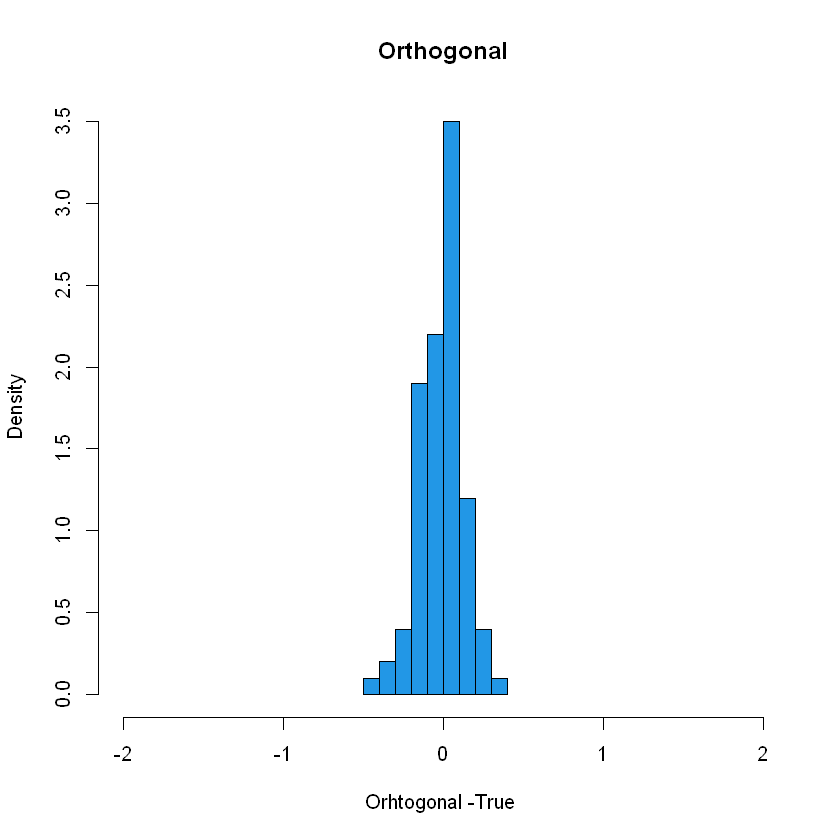

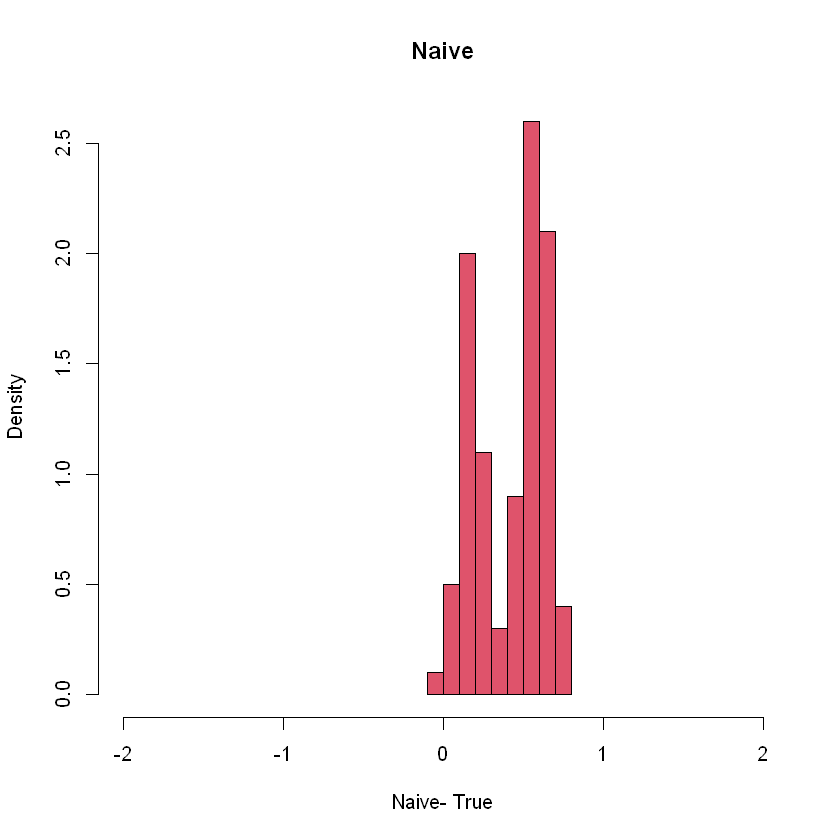

In [3]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")

In [4]:
library(hdm)

set.seed(1)
B= 1000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2
X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso
if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


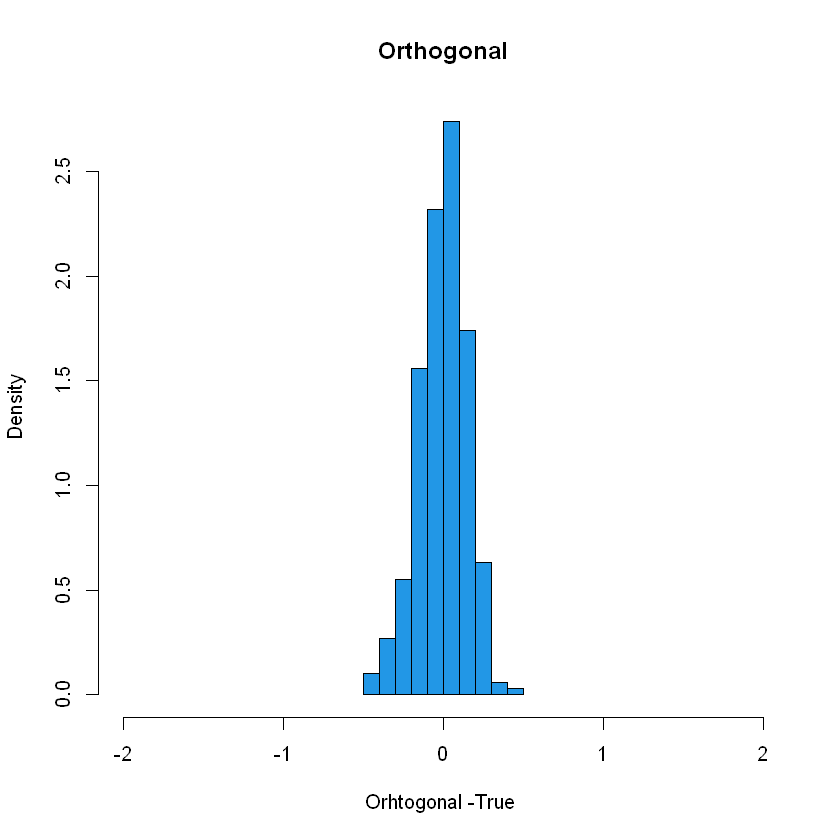

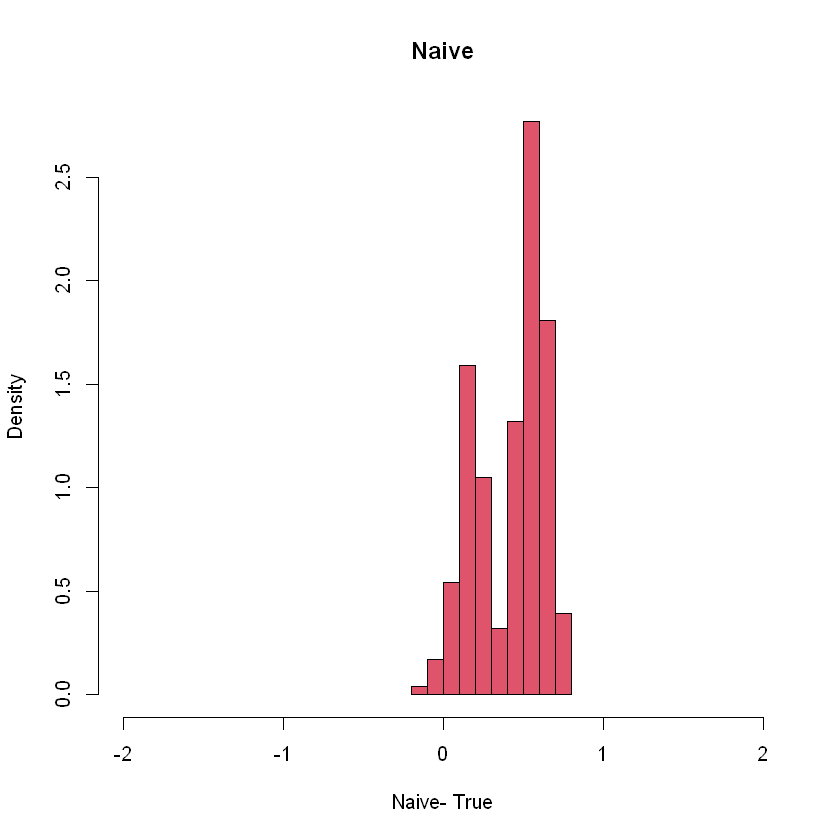

In [5]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


In [6]:
library(hdm)

set.seed(1)
B= 10000 # trials 
Naive = rep(0, B)
Orthogonal = rep(0, B)

for (i in 1:B){
    
n=1000
p= 100
beta = 1/(1:p)^2
gamma =1/(1:p)^2
X=matrix(rnorm(n*p), n, p)
D=   X%*%gamma + rnorm(n)/4
Y = 10*D+ X%*%beta + rnorm(n)
# single selection method
SX.IDs = which(rlasso(Y~ D+X)$coef[-c(1,2)] !=0)  #select covariates by Lasso
if (sum(SX.IDs)==0) {Naive[i] = lm(Y~ D)$coef[2]}
if (sum(SX.IDs)>0) {Naive[i] = lm(Y~ D + X[,SX.IDs])$coef[2]}
#partialling out
resY = rlasso(Y~ X, Post=T)$res
resD = rlasso(D~ X, Post=T)$res
Orthogonal[i]= lm(resY ~ resD)$coef[2]

}


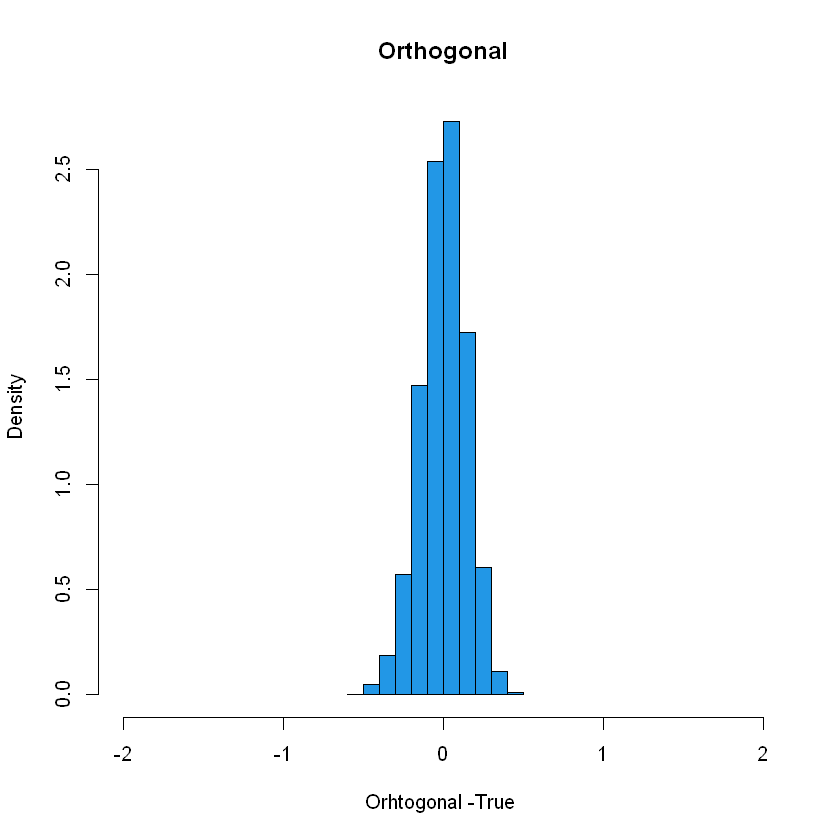

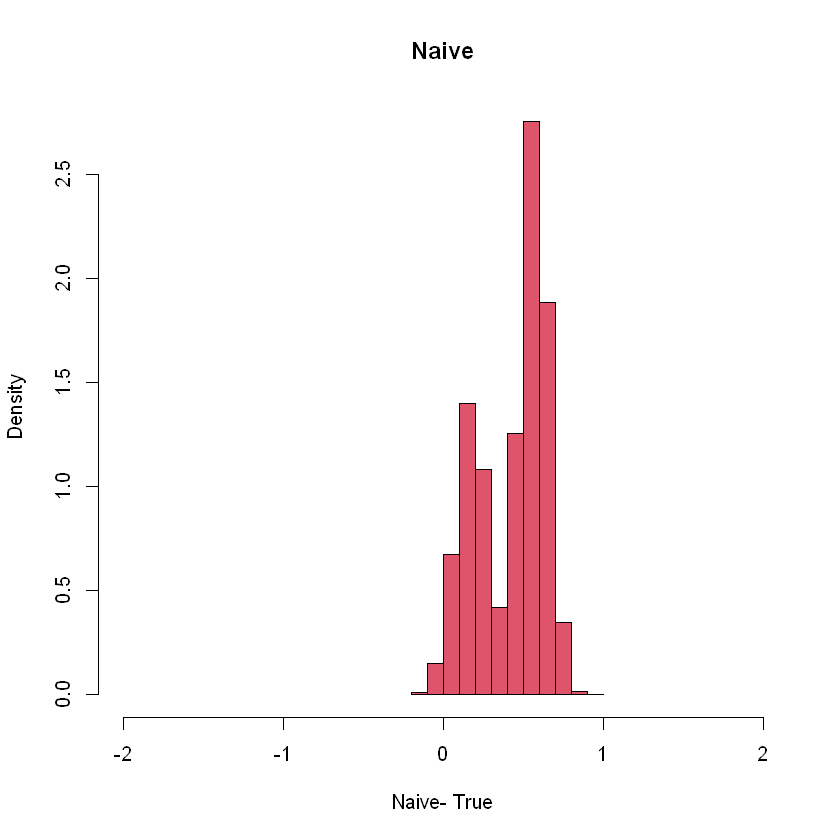

In [7]:
hist(Orthogonal-10,col=4, freq=F, xlim= c(-2, 2), xlab= "Orhtogonal -True ", main="Orthogonal")
hist(Naive-10, col=2, freq=F, xlim= c(-2,2), xlab= "Naive- True", main = "Naive")


## Interpretation
The distribution of the histograms is different because they are grouped at various points. When B, what is the number of trials, is higher, the distribution is bigger. Also, the orthogonal should be centered in zero and the Naive should be centered in numbers higher than zero. The last one is biased to the right.

The econometric explanation is based on the approach to data modeling. For the orthogonal distribution, it is assumed that the features (variables) are orthogonal to each other, meaning that they are not correlated. When the errors are orthogonal to each other, it means that they are not correlated and that there is no systematic bias in the relationship between the dependent variable and the dependent variables. This is desirable because it implies that the regression model effectively captures the relationship between variables without additional bias. Zero-centering of the distribution can arise due to the way the model is specified, such as including an intercept or by standardizing variables. On the other hand, for the Naïve distribution, the bias to the right may arise from the nature of the data and the way the conditional probabilities of the variables are modeled. This could be related to the distribution of errors in a regression model. If errors have an asymmetric distribution, such as a right-weighted (positively biased) tail distribution, this can affect how relationships between variables are modeled.

## Parallel computing
Using parallel computing, the running time is lower. The multiprocessing module allows you to create multiple child processes, each of which can execute code independently. These processes can take advantage of the multiple CPU cores available on your machine, resulting in workload distribution and, in many cases, a significant reduction in execution time.. For example (B=100)

In [20]:
library(parallel)

# Definir la función sleep
sleep <- function(sleep_sec = 0.5) {
  cat(paste("Sleeping for", sleep_sec, "seconds\n"))
  Sys.sleep(sleep_sec)
  cat("Finished sleeping\n")
}


num_cores <- detectCores() # Obtener el número de núcleos de CPU
print(num_cores) # Imprimir el número de núcleos de CPU

start_time <- Sys.time() # Iniciar el temporizador

cl <- makeCluster(num_cores) # Crear un clúster de núcleos

# Ejecutar la función sleep en paralelo
result <- parLapply(cl, 1:100, function(x) sleep(1.0))

# Detener el clúster
stopCluster(cl)

# Detener el temporizador y calcular el tiempo transcurrido
finish_time <- Sys.time()
tiempo <- finish_time - start_time

# Imprimir el tiempo transcurrido
print(paste("With Parallel computing, the running time is ", tiempo, "minutes"))

[1] 4


ERROR: Error in checkForRemoteErrors(val): 4 nodes produced errors; first error: no se pudo encontrar la función "sleep"
